In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Extract CSVs into DataFrames

In [2]:
GDP_file = "Resources/GDP.csv"
GDP_df = pd.read_csv(GDP_file)
GDP_df

,SDG_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2015,2015,4.87531,NaN,NaN
1,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2016,2016,5.34201,NaN,NaN
2,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2017,2017,5.41966,NaN,NaN
3,XGDP_FSGOV,Government expenditure on education as a perce...,CHL,Chile,2018,2018,5.43317,NaN,NaN
4,XGDP_FSGOV,Government expenditure on education as a perce...,IND,India,2015,2015,3.28573,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2015,2015,5.92651,+,National Estimation
764,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2016,2016,5.98030,+,National Estimation
765,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2017,2017,6.10751,+,National Estimation
766,XGDP_FSGOV,Government expenditure on education as a perce...,SUR,Suriname,2018,2018,5.68860,+,National Estimation


### Transform GDP DataFrame

In [3]:
GDP_df = GDP_df[['SDG_IND','Indicator','Country','Time','Value']]
GDP_df = GDP_df.set_index('Country')
GDP_df=GDP_df.rename(columns={'Time':'Year','Value':'Percent'})
GDP_df

,SDG_IND,Indicator,Year,Percent
Country,,,,
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2015,4.87531
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2016,5.34201
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2017,5.41966
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2018,5.43317
India,XGDP_FSGOV,Government expenditure on education as a perce...,2015,3.28573
...,...,...,...,...
Suriname,XGDP_FSGOV,Government expenditure on education as a perce...,2015,5.92651
Suriname,XGDP_FSGOV,Government expenditure on education as a perce...,2016,5.98030
Suriname,XGDP_FSGOV,Government expenditure on education as a perce...,2017,6.10751


In [4]:
GDP_trim_df = GDP_df.loc[GDP_df["Year"] <2018]
GDP_trim_df

,SDG_IND,Indicator,Year,Percent
Country,,,,
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2015,4.87531
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2016,5.34201
Chile,XGDP_FSGOV,Government expenditure on education as a perce...,2017,5.41966
India,XGDP_FSGOV,Government expenditure on education as a perce...,2015,3.28573
India,XGDP_FSGOV,Government expenditure on education as a perce...,2016,3.45098
...,...,...,...,...
Greenland,XGDP_FSGOV,Government expenditure on education as a perce...,2016,11.08614
Greenland,XGDP_FSGOV,Government expenditure on education as a perce...,2017,11.02856
Suriname,XGDP_FSGOV,Government expenditure on education as a perce...,2015,5.92651


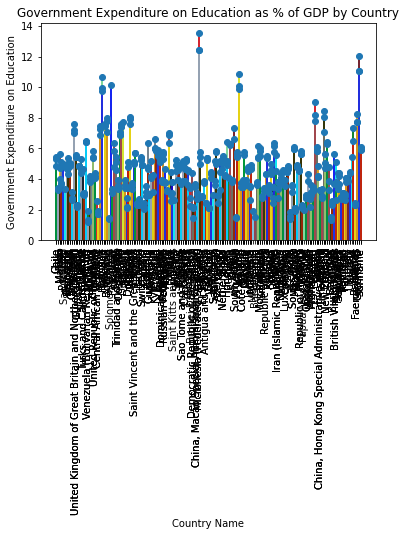

In [12]:
# using subplots() to draw vertical lines
fig, axes = plt.subplots()
axes.vlines(GDP_trim_df.index, ymin=0, ymax=GDP_trim_df['Percent'])
  
# drawing the markers (circle)
axes.plot(GDP_trim_df.index, GDP_trim_df['Percent'], "o")
axes.set_ylim(0)


line_colors = ['blue', 'cyan', 'green', 'red',
               'skyblue', 'brown', 'yellow',
               'black', 'grey', 'orange', 'maroon',
               'lightgreen']
  
axes.vlines(GDP_trim_df.index, ymin=0,
            ymax=GDP_trim_df['Percent'], colors=line_colors)


# formatting and details
plt.xlabel('Country Name')
plt.ylabel('Government Expenditure on Education')
plt.title('Government Expenditure on Education as % of GDP by Country')
plt.xticks(GDP_trim_df.index)
plt.xticks(rotation=90)
plt.show()

In [14]:
GERD_file = "Resources/GERD.csv"
GERD_df = pd.read_csv(GERD_file)
GERD_df

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,20600,GERD - Total (in '000 local currency),AUS,Australia,2013,2013,3.347150e+07,NaN,NaN
1,20600,GERD - Total (in '000 local currency),AUS,Australia,2015,2015,3.117900e+07,NaN,NaN
2,20600,GERD - Total (in '000 local currency),AUS,Australia,2017,2017,3.306200e+07,NaN,NaN
3,20600,GERD - Total (in '000 local currency),AUT,Austria,2013,2013,9.571282e+06,NaN,NaN
4,20600,GERD - Total (in '000 local currency),AUT,Austria,2014,2014,1.027518e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6527,EXPGDP_TOT,GERD as a percentage of GDP,MRT,Mauritania,2018,2018,1.081000e-02,NaN,NaN
6528,EXPCAPPPP_CUR,GERD per capita (in current PPP$),MRT,Mauritania,2018,2018,5.577300e-01,NaN,NaN
6529,EXPPPP_CUR,GERD in '000 current PPP$,MRT,Mauritania,2018,2018,2.455848e+03,NaN,NaN
6530,EXPPPP_CONST,GERD in '000 PPP$ (in constant prices - 2005),MRT,Mauritania,2018,2018,1.929943e+03,NaN,NaN


### Transform GERD DataFrame

In [15]:
# Create a filtered dataframe from specific columns

GERD_df = GERD_df[['INDICATOR','Indicator','Country','Time','Value']]
GERD_df=GERD_df.rename(columns={'INDICATOR':'GERD_INDICATOR','Time':'Year','Value':'Percent'})
GERD_df = GERD_df.set_index('Country')
GERD_df=GERD_df.loc[GERD_df['GERD_INDICATOR']== 'EXPGDP_TOT']
GERD_df

,GERD_INDICATOR,Indicator,Year,Percent
Country,,,,
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2013,2.17870
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2017,1.87466
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2013,2.95492
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2014,3.08429
...,...,...,...,...
Eswatini,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.26661
Syrian Arab Republic,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.02053
Côte d'Ivoire,EXPGDP_TOT,GERD as a percentage of GDP,2016,0.07040


In [9]:
dates = [2013, 2014, 2018]
GERD_clean_df=GERD_trim_df[GERD_trim_df.Year.isin(dates) == False]
GERD_clean_df

,GERD_INDICATOR,Indicator,Year,Percent
Country,,,,
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2015,1.91918
Australia,EXPGDP_TOT,GERD as a percentage of GDP,2017,1.87466
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2015,3.04969
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2016,3.11659
Austria,EXPGDP_TOT,GERD as a percentage of GDP,2017,3.04885
...,...,...,...,...
Papua New Guinea,EXPGDP_TOT,GERD as a percentage of GDP,2016,0.03158
Eswatini,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.26661
Syrian Arab Republic,EXPGDP_TOT,GERD as a percentage of GDP,2015,0.02053


In [11]:
TotalRD_file = "R_D_Total.csv"
TotalRD_df = pd.read_csv(TotalRD_file,header=1)
TotalRD_df=TotalRD_df.rename(columns={'Time':'Year', 'Value':'Number per 000s'})
TotalRD_df = TotalRD_df.set_index('Country')
TotalRD_df

,Time,Number per 000s
Country,,
Algeria,2017,8.34905
Angola,2016,0.18168
Argentina,2015,5.5933
Argentina,2016,5.73809
Argentina,2017,5.55853
...,...,...
United Arab Emirates,2016,20.37984
Uruguay,2015,2.56995
Uruguay,2016,2.53343


In [ ]:
# print("************************************")
# print("2018 Unemployment (% of labor force)")
# print("************************************")

# unemployment_df = unemployment_f_df.merge(unemployment_m_df, on='Country Name')
# unemployment_df = unemployment_df.merge(unemployment_total_df, on='Country Name')
# unemployment_df

In [ ]:
county_cols = ["ID", "County Name (Licensee)", "County ID Code", "License Count"]
county_transformed = county_df[county_cols].copy()

# Rename the column headers
county_transformed = county_transformed.rename(columns={"ID": "id",
                                                         "County Name (Licensee)": "county_name",
                                                         "License Count": "license_count",
                                                         "County ID Code": "county_id"})

# Set index
county_transformed.set_index("id", inplace=True)

county_transformed.head()

### Create database connection

In [ ]:
connection_string = "postgres:postgres@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{connection_string}')

In [ ]:
# Confirm tables
engine.table_names()

### Load DataFrames into database

In [ ]:
premise_transformed.to_sql(name='premise', con=engine, if_exists='append', index=True)

In [ ]:
county_transformed.to_sql(name='county', con=engine, if_exists='append', index=True)